##### This project aims to automate loan approval processes of Financial Institutions they by reducing turn around time for loan requests, removing biases etc.

##### We will follow the following steps to achieve this;
    -- Loading and exploring the data
    -- Dropping unecessary columns
    -- Working with missing values
    -- Visualization
    -- Encoding the categorical data
    -- Model Development
        -- Splitting the data into test/train
        -- Using GaussianNB
        -- Loss function
        -- Using SVC with Grid Search CV
        -- XGBoost classifier
        -- Decision Tree using randomized search
        -- Random forest using randomized search
    -- Selecting and saving the model
    -- Deployment


Start by importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load our dataset from our local machine

In [2]:

import pandas as pd
df = pd.read_csv(r'C:\Users\affuy\Documents\LHL\Data_Sets\train_u6lujuX_CVtuZ9i (1).csv')

View first few rows to understand the dataset 

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe().round(decimals=0)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.0,614.0,592.0,600.0,564.0
mean,5403.0,1621.0,146.0,342.0,1.0
std,6109.0,2926.0,86.0,65.0,0.0
min,150.0,0.0,9.0,12.0,0.0
25%,2878.0,0.0,100.0,360.0,1.0
50%,3812.0,1188.0,128.0,360.0,1.0
75%,5795.0,2297.0,168.0,360.0,1.0
max,81000.0,41667.0,700.0,480.0,1.0


Let's check for null values in the dataset

In [7]:
def missing_values(dataset):
    a = num_null_values = dataset.isnull().sum()
    return a
missing_values(df)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Our dataset has null values so we have to handle them. We will start with handling categorical values.
##### We will start by dropping the loan ID and dependents columns because we do not require them for the model as they have no influence over if a loan is approved or not.

In [8]:
df.drop('Loan_ID', axis=1, inplace=True)

# View data after dropping unwanted columns
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# Let's view categorical columns with null values
cols = df[['Gender', 'Married', 'Self_Employed', 'Dependents']]
for i in cols:
    df[i].fillna(df[i].mode().iloc[0], inplace=True)

We have replaced the null values of the categorical columns with the mode of the respective columns. Let's view our dataset again

In [10]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Next we with deal with missing data of the numerical data

In [11]:
n_cols = df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
for i in n_cols:
    df[i].fillna(df[i].mean(), inplace=True)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# Lets view information about our analysed data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


#### Let us now encode our categorical features before applying SMOTE to balance all imbalanced features. We will use both ordinal and one-hot encoding to achieve this since some of the categorical features have non-binary classes. First we use ordinal encoding for the dependents column since its a non-binary class.

In [13]:
# Mapping ordinal values for the 'Dependents' feature
dependents_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}

# Apply the mapping to the 'Dependents' column
df['Dependents'] = df['Dependents'].map(dependents_mapping)

#### Next we use one-hot encoding for the categorical columns

In [14]:
# One-hot encode all categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], drop_first=True)

In [15]:
# View the full encoded dataset
# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0  146.412162   
1           1             4583             1508.0  128.000000   
2           0             3000                0.0   66.000000   
3           0             2583             2358.0  120.000000   
4           0             6000                0.0  141.000000   

   Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
0             360.0             1.0            1            0   
1             360.0             1.0            1            1   
2             360.0             1.0            1            1   
3             360.0             1.0            1            1   
4             360.0             1.0            1            0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   

#### Next we will define a function to view the count of the classes of each category

In [16]:
# Create function to view classification of the categorical features
def get_categorical_counts(dataframe, column_name):
    """
    Get the value counts of a categorical column in a DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the categorical column.

    Returns:
    - pd.Series: The value counts of the specified column.
    """
    # Check if the column is categorical
    if dataframe[column_name].dtype == 'O':
        # Display the count of each category in the specified column
        counts = dataframe[column_name].value_counts()
        return counts
    else:
        return f"The specified column '{column_name}' is not categorical."

# Example usage:
gender_counts = get_categorical_counts(df, 'Gender')
married_counts = get_categorical_counts(df, 'Married')
dependents_counts = get_categorical_counts(df, 'Dependents')
education_counts = get_categorical_counts(df, 'Education')
self_employed_counts = get_categorical_counts(df, 'Self_Employed')
property_area_counts = get_categorical_counts(df, 'Property_Area')
loan_status_counts = get_categorical_counts(df, 'Loan_Status')

# Display the results
print("Gender counts:")
print(gender_counts)

print("\nMarital Status counts:")
print(married_counts)

print("\nDependents Status counts:")
print(dependents_counts)

print("\nEducation Status counts:")
print(education_counts)

print("\nSelf Employed Status counts:")
print(self_employed_counts)

print("\nProperty Area counts:")
print(property_area_counts)

print("\nLoan Status counts:")
print(loan_status_counts)


Gender counts:
Male      502
Female    112
Name: Gender, dtype: int64

Marital Status counts:
Yes    401
No     213
Name: Married, dtype: int64

Dependents Status counts:
The specified column 'Dependents' is not categorical.

Education Status counts:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self Employed Status counts:
No     532
Yes     82
Name: Self_Employed, dtype: int64

Property Area counts:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan Status counts:
Y    422
N    192
Name: Loan_Status, dtype: int64


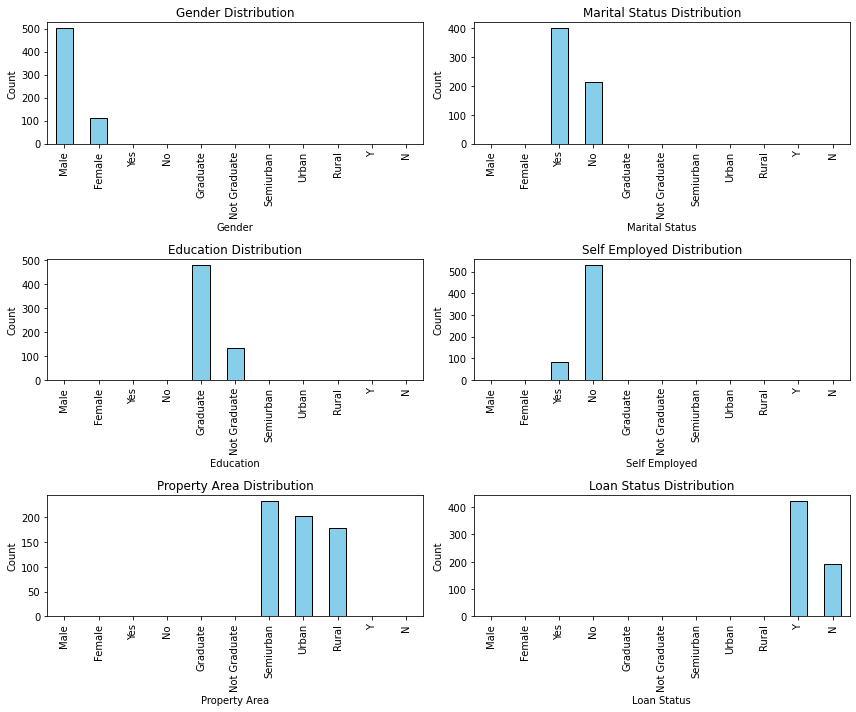

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
gender_counts = {'Male': 502, 'Female': 112}
marital_counts = {'Yes': 401, 'No': 213}
education_counts = {'Graduate': 480, 'Not Graduate': 134}
self_employed_counts = {'No': 532, 'Yes': 82}
property_area_counts = {'Semiurban': 233, 'Urban': 202, 'Rural': 179}
loan_status_counts = {'Y': 422, 'N': 192}

# Combine data for visualization
data = {
    'Gender': gender_counts,
    'Marital Status': marital_counts,
    'Education': education_counts,
    'Self Employed': self_employed_counts,
    'Property Area': property_area_counts,
    'Loan Status': loan_status_counts
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

for i, (feature, counts) in enumerate(df.items()):
    ax = axes[i // 2, i % 2]
    counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{feature} Distribution')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)

plt.tight_layout()
plt.show()


##### It is clear that there is a significant imbalance within most of our features which may affect how our data performs with unseen data. We will use a method called SMOTE which stands for Synthetic Minority Over-sampling Technique to address class imbalance in classification tasks.

In [18]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming your encoded DataFrame is named 'df_encoded'
X = df_encoded.drop('Loan_Status_Y', axis=1)  # Features
y = df_encoded['Loan_Status_Y']  # Target variable

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the first few rows of the resampled DataFrame
print(df_resampled.head())


   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0  146.412162   
1           1             4583             1508.0  128.000000   
2           0             3000                0.0   66.000000   
3           0             2583             2358.0  120.000000   
4           0             6000                0.0  141.000000   

   Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
0             360.0             1.0            1            0   
1             360.0             1.0            1            1   
2             360.0             1.0            1            1   
3             360.0             1.0            1            1   
4             360.0             1.0            1            0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   

### Lets see our encoded data before and after applying SMOTE to ensure its now balanced

In [19]:
def view_balance_before_after_smote_categorical(df_before, df_after):
    """
    View the class distribution of each categorical feature/column before and after applying SMOTE.

    Parameters:
    - df_before: pd.DataFrame
        The original DataFrame before applying SMOTE.
    - df_after: pd.DataFrame
        The DataFrame after applying SMOTE.

    Returns:
    - balance_info_before: pd.DataFrame
        DataFrame containing the counts of each class in each categorical feature/column before SMOTE.
    - balance_info_after: pd.DataFrame
        DataFrame containing the counts of each class in each categorical feature/column after SMOTE.
    """
    categorical_columns = df_before.select_dtypes(include=['object', 'uint8']).columns
    balance_info_before = df_before[categorical_columns].apply(lambda x: x.value_counts()).T
    balance_info_after = df_after[categorical_columns].apply(lambda x: x.value_counts()).T

    return balance_info_before, balance_info_after

# Example usage
balance_before_categorical, balance_after_categorical = view_balance_before_after_smote_categorical(df_encoded, df_resampled)
print("Class distribution for each categorical feature before SMOTE:")
print(balance_before_categorical)
print("\nClass distribution for each categorical feature after SMOTE:")
print(balance_after_categorical)


Class distribution for each categorical feature before SMOTE:
                           0    1
Gender_Male              112  502
Married_Yes              213  401
Education_Not Graduate   480  134
Self_Employed_Yes        532   82
Property_Area_Semiurban  381  233
Property_Area_Urban      412  202
Loan_Status_Y            192  422

Class distribution for each categorical feature after SMOTE:
                           0    1
Gender_Male              196  648
Married_Yes              359  485
Education_Not Graduate   681  163
Self_Employed_Yes        757   87
Property_Area_Semiurban  596  248
Property_Area_Urban      611  233
Loan_Status_Y            422  422


#### VISUALIZATION
This task is a classification problem because it involves predicting a discrete output variable, specifically the 'Loan_Status,' which appears to be a binary variable with values 0 and 1. In classification problems, the goal is to assign input data points to predefined categories or classes. 

In this scenario, the objective is to categorize loan applications into either approved (1) or declined (0) based on various input features such as 'Gender,' 'Married,' 'Education,' and others. The nature of the 'Loan_Status' variable, representing distinct classes indicating loan approval outcomes, aligns with the characteristics of a classification problem, where the aim is to build a model that can learn and generalize patterns from historical data to make predictions on new, unseen instances.

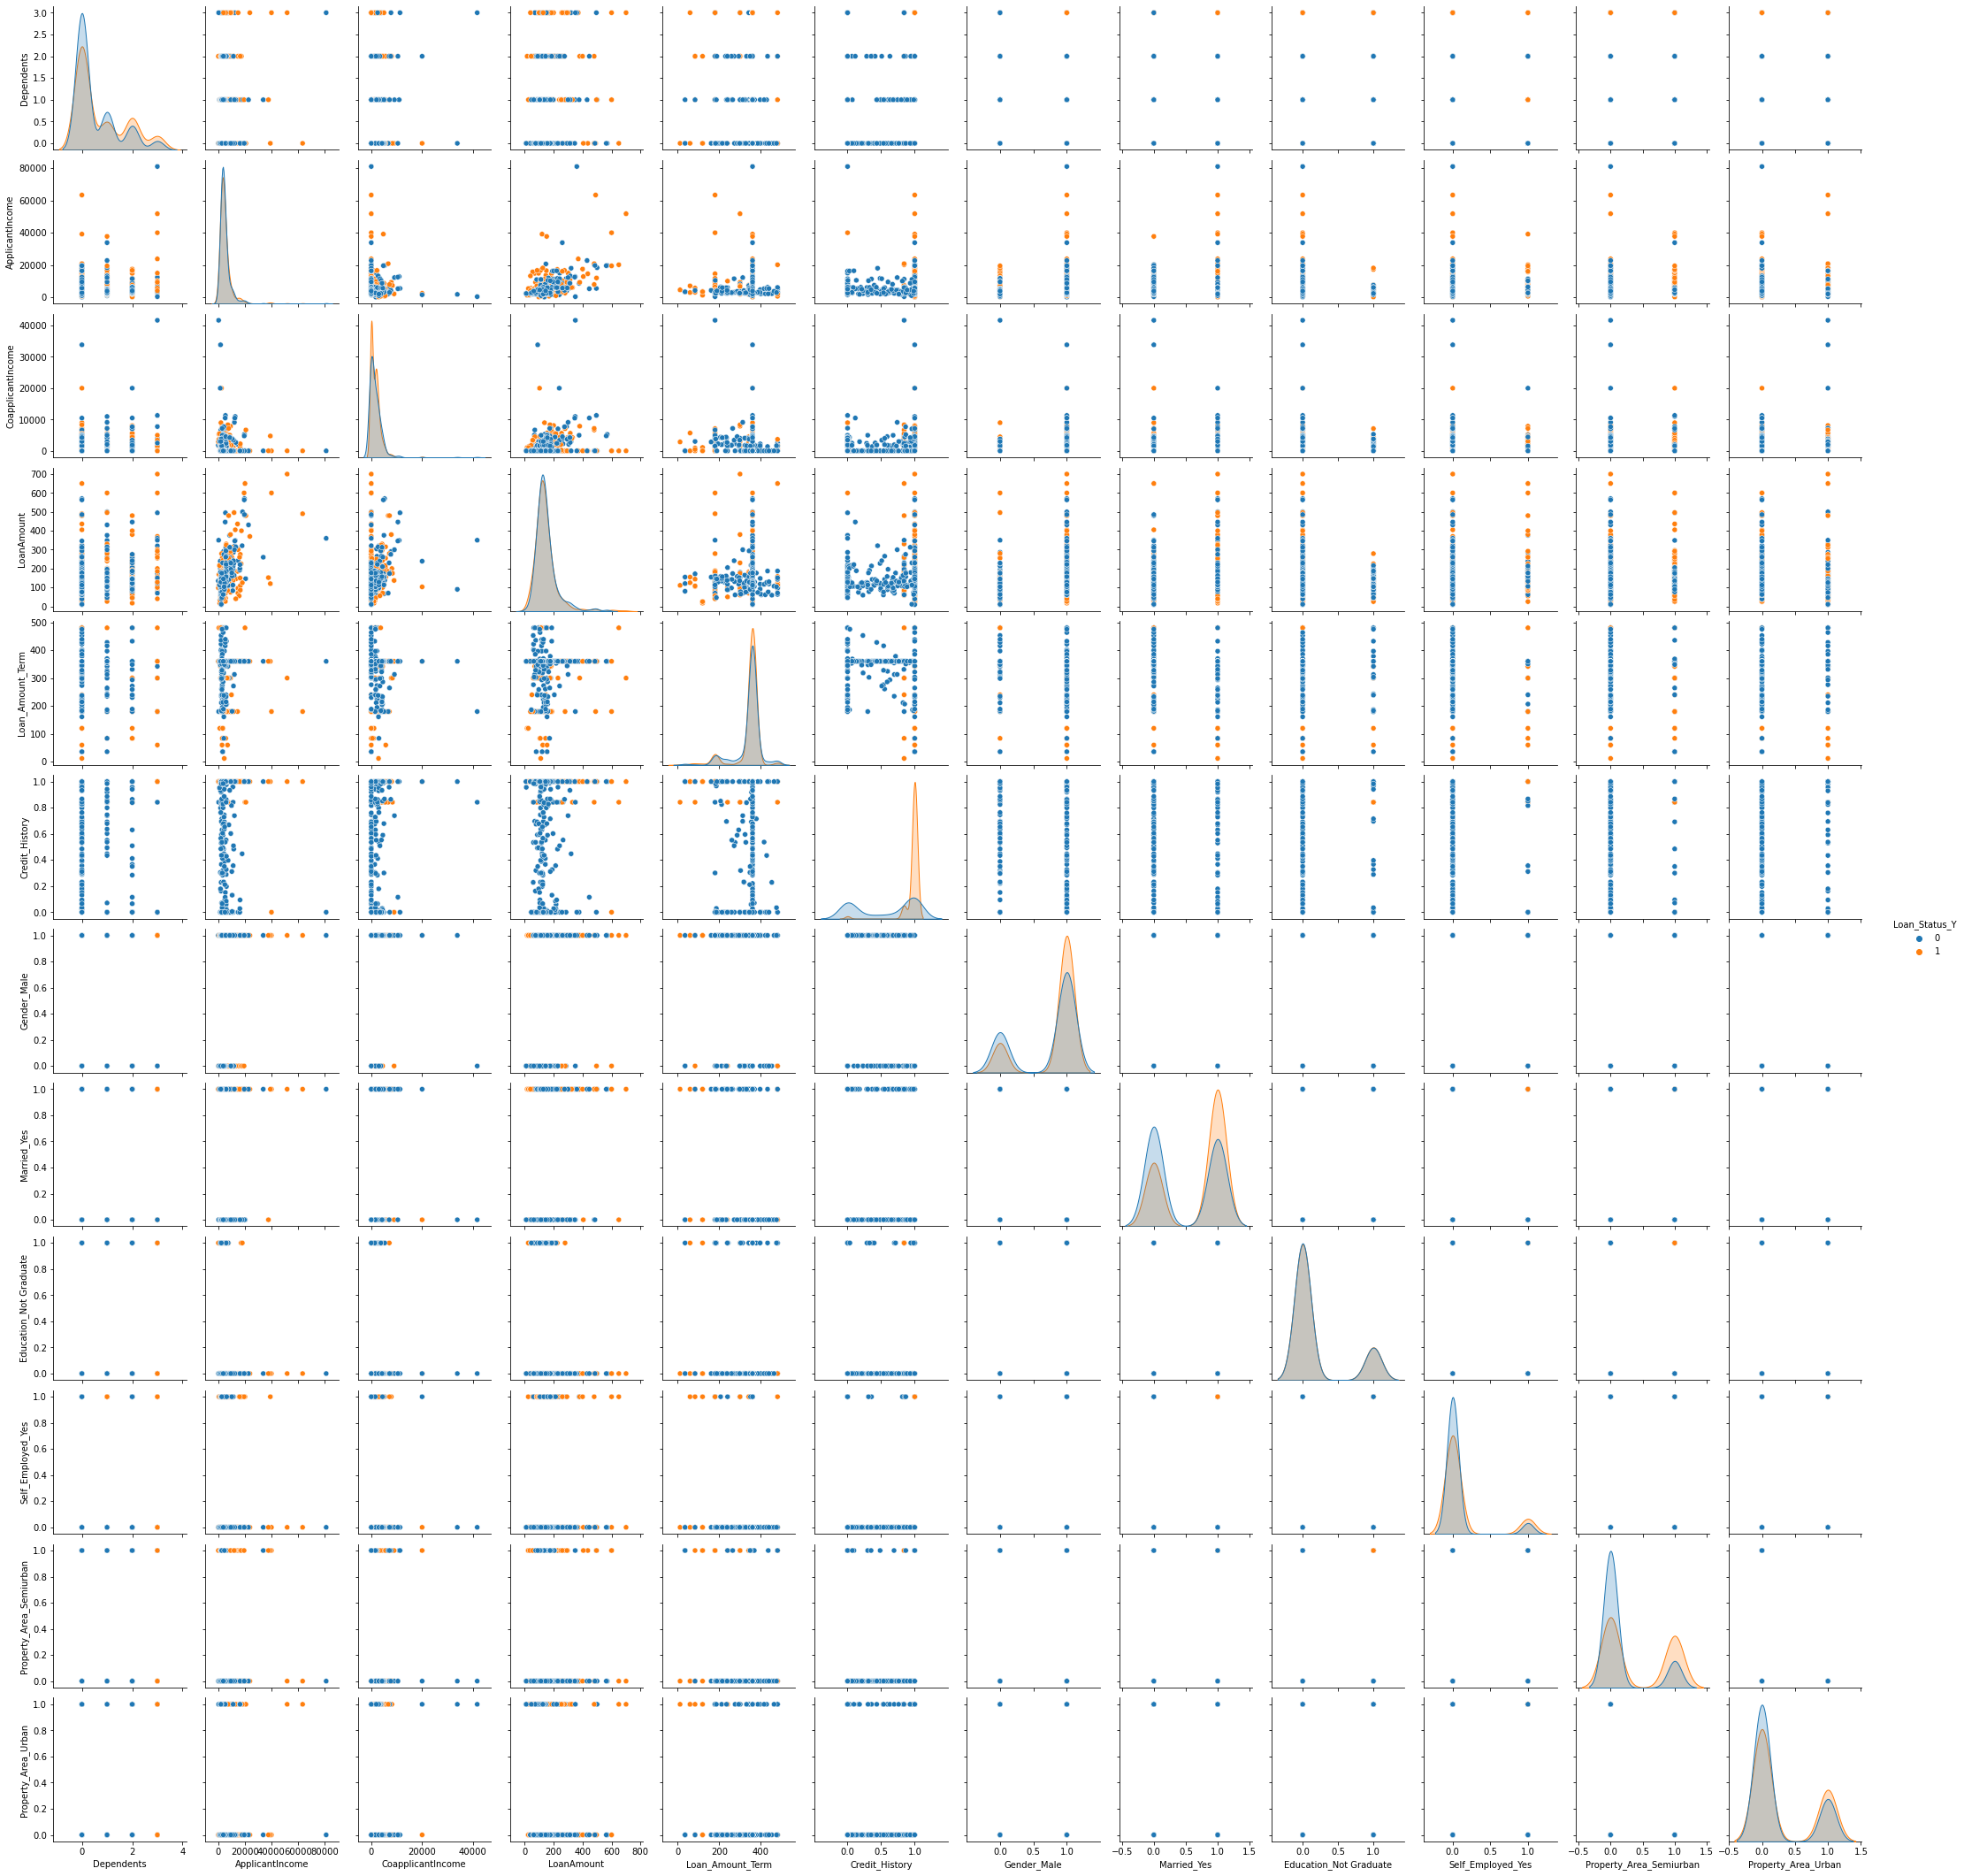

In [20]:
# Visualize relationships between predictor variables and the outcome variable
sns.pairplot(df_resampled, hue='Loan_Status_Y', diag_kind='kde')
plt.show()

The above pairplot does not really show the relationships between feature pairs so we will use the correlation matrix to get a clearer idea. 

Exploring feature relationships in your loan approval project is not only beneficial for data analysis and interpretability but also plays a crucial role in guiding the choice of the machine learning algorithm. 

Understanding the relationships between features helps in assessing whether the assumptions of certain algorithms, such as independence between features, hold true for your dataset. For instance, if features are highly correlated, linear models like logistic regression may be influenced, and alternative models such as decision trees or ensemble methods might be considered. 

Moreover, identifying which features are more influential in predicting 'Loan_Status' can guide the selection of algorithms that handle feature importance differently. This thorough exploration of feature relationships contributes not only to the reliability of your predictive model but also to the strategic choice of a machine learning algorithm that aligns with the characteristics of your dataset and the goals of the loan approval project.


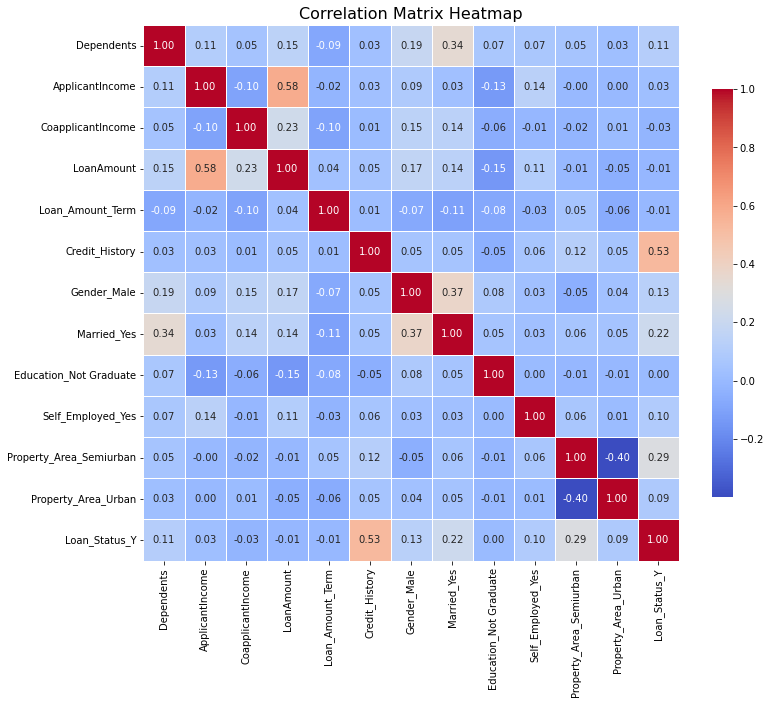

In [21]:
# Display the correlation matrix
# Set the size of the plot
plt.figure(figsize=(12, 10))
# Create a correlation matrix
correlation_matrix = df_resampled.corr()

# Customize the heatmap for better aesthetics
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})

# Set the title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

#### Given the outcome of the correlation matrix, which indicates limited correlation between features, particularly with only 'LoanAmount' and 'ApplicantIncome' showing a fair degree of correlation, linear models might not be the most suitable choice. Linear models, such as Gaussian Naive Bayes (GaussianNB) and Support Vector Classifier (SVC), assume linear relationships between features and the target variable. However, the lack of strong correlations suggests that the relationships may be more complex.

We will use a bar chart to visualize the number of approved and Declined loans.

### Categorical Variable Distribution Visualization

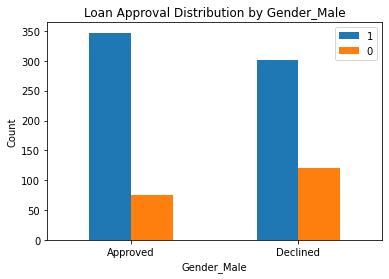

In [22]:
import pandas as pd

# Assuming your DataFrame is named 'df_encoded'
def bar_chart(col):
    """
    Generate a bar chart to visualize the distribution of a categorical variable
    based on loan approval status.

    Parameters:
    - col: str
        The name of the categorical column for which the bar chart is generated.

    Usage:
    bar_chart('ColumnName')

    Example:
    bar_chart('Property_Area')
    """
    # Filter data for approved and declined loan status
    approved = df_resampled[df_resampled['Loan_Status_Y'] == 1][col].value_counts()
    declined = df_resampled[df_resampled['Loan_Status_Y'] == 0][col].value_counts()
    
    # Create a DataFrame for visualization
    df1 = pd.DataFrame([approved, declined])
    df1.index = ['Approved', 'Declined']
    
    # Plot a bar chart with title
    ax = df1.plot(kind='bar', rot=0, title=f'Loan Approval Distribution by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Example usage
bar_chart('Gender_Male')


### We notice that males have a higher number of approved loans and also larger number of declined loans. So lets view the percentage of male and female in the dataset.

In [23]:
def calculate_percentage(df, col):
    """
    Calculate and display the percentage of each category in a given column.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the data.
    - col: str
        The name of the column for which to calculate percentages.

    Returns:
    None
    """

    # Calculate the total count for each category
    category_counts = df_resampled[col].value_counts()

    # Calculate the total number of entries (excluding missing values)
    total_entries = category_counts.sum()

    # Calculate and display the percentage for each category
    for category in category_counts.index:
        percentage = (category_counts[category] / total_entries) * 100
        print(f"Percentage of {category}: {percentage:.2f}%")

# Example usage
calculate_percentage(df_resampled, 'Gender_Male')

Percentage of 1: 76.78%
Percentage of 0: 23.22%


### Lets look at Married column('Married_Yes')

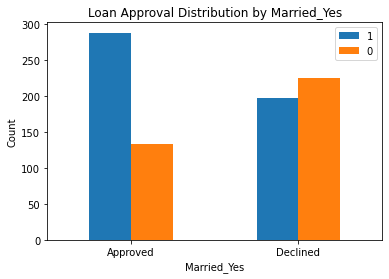

In [24]:
bar_chart('Married_Yes')

#### We also see that 'Married'people have a higher loan approval than unmarried ones. Again we view the representation of both married and unmarried

In [25]:
calculate_percentage(df, 'Married_Yes')

Percentage of 1: 57.46%
Percentage of 0: 42.54%


The number of married people represented in the dataset is now almost evenly split. Let's look a 'Education' next.

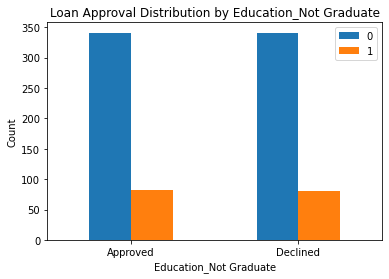

In [26]:
bar_chart('Education_Not Graduate')

#### More loans are approved for Graduates over people that did not graduate and the same applies to loans declined. Again lets see how they're represented in our dataset.

In [27]:
calculate_percentage(df_resampled, 'Education_Not Graduate')

Percentage of 0: 80.69%
Percentage of 1: 19.31%


#### And again, we have more graduates represented in our dataset. Lastly we check for 'Self_Employed' people.

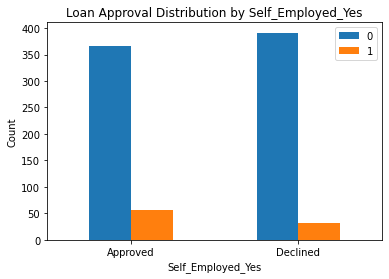

In [28]:
bar_chart('Self_Employed_Yes')

#### We can see that more loans are approved and declined for people that are not Self_Employed.

In [29]:
calculate_percentage(df_resampled, 'Self_Employed_Yes')

Percentage of 0: 89.69%
Percentage of 1: 10.31%


### Preprocessing

#### Let us create some additional columns from our existing features that will help our model's generalization to new unseen data. 

Total Income Feature

In [30]:
# The 'Total_Income' feature combines the individual incomes of the applicant and co-applicant, providing a holistic view of the household's financial capacity.
df_resampled['Total_Income'] = df_resampled['ApplicantIncome'] + df_resampled['CoapplicantIncome']

In [31]:
# Loan Amount to Total Income Ratio Feature
df_resampled['LoanAmount_to_TotalIncome_Ratio'] = df_resampled['LoanAmount'] / df_resampled['Total_Income']

# Description: The 'LoanAmount_to_TotalIncome_Ratio' feature represents the ratio of the loan amount to the total income, 
# offering insights into the borrower's ability to manage repayments relative to their overall income.

In [32]:
# Loan Term Multiplier Feature
df_resampled['LoanTerm_Multiplier'] = df_resampled['Loan_Amount_Term'] * df_resampled['LoanAmount']

# Description: The 'LoanTerm_Multiplier' feature multiplies the loan amount by the loan term, 
# providing a measure of the total amount repayable over the loan term, capturing the overall financial commitment.

In [33]:
# Display the updated DataFrame with new features
print(df_resampled.head())

   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0  146.412162   
1           1             4583             1508.0  128.000000   
2           0             3000                0.0   66.000000   
3           0             2583             2358.0  120.000000   
4           0             6000                0.0  141.000000   

   Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
0             360.0             1.0            1            0   
1             360.0             1.0            1            1   
2             360.0             1.0            1            1   
3             360.0             1.0            1            1   
4             360.0             1.0            1            0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   

In [34]:
print(df_resampled.isnull().sum())

Dependents                         0
ApplicantIncome                    0
CoapplicantIncome                  0
LoanAmount                         0
Loan_Amount_Term                   0
Credit_History                     0
Gender_Male                        0
Married_Yes                        0
Education_Not Graduate             0
Self_Employed_Yes                  0
Property_Area_Semiurban            0
Property_Area_Urban                0
Loan_Status_Y                      0
Total_Income                       0
LoanAmount_to_TotalIncome_Ratio    0
LoanTerm_Multiplier                0
dtype: int64


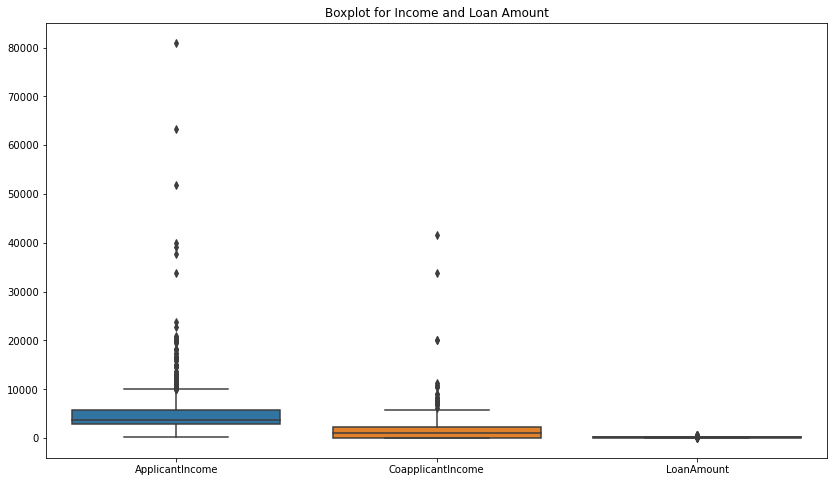

In [35]:
##### Let's begin by checking if there are outlier in our dataset
# Checking for outliers using box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_resampled[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Boxplot for Income and Loan Amount')
plt.show()

These features posses a lot of outliers and we must address them by capping them within range to the 95th percentile

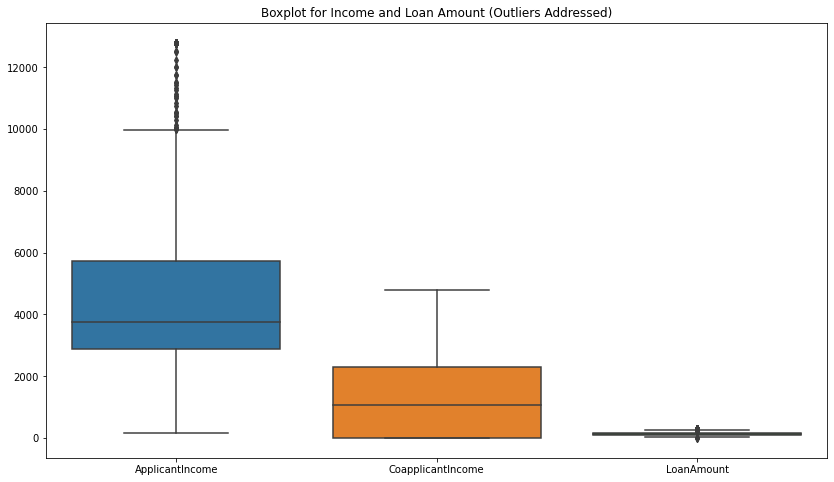

In [36]:
# Addressing outliers by capping values at the 95th percentile
columns_to_cap = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in columns_to_cap:
    percentile_95 = df_resampled[col].quantile(0.95)
    df_resampled[col] = np.where(df_resampled[col] > percentile_95, percentile_95, df_resampled[col])
# Display updated box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_resampled[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Boxplot for Income and Loan Amount (Outliers Addressed)')
plt.show()


Now the outliers have been handled. Lets see how are dataset is distributed to further help us determine the best model algorithm to use

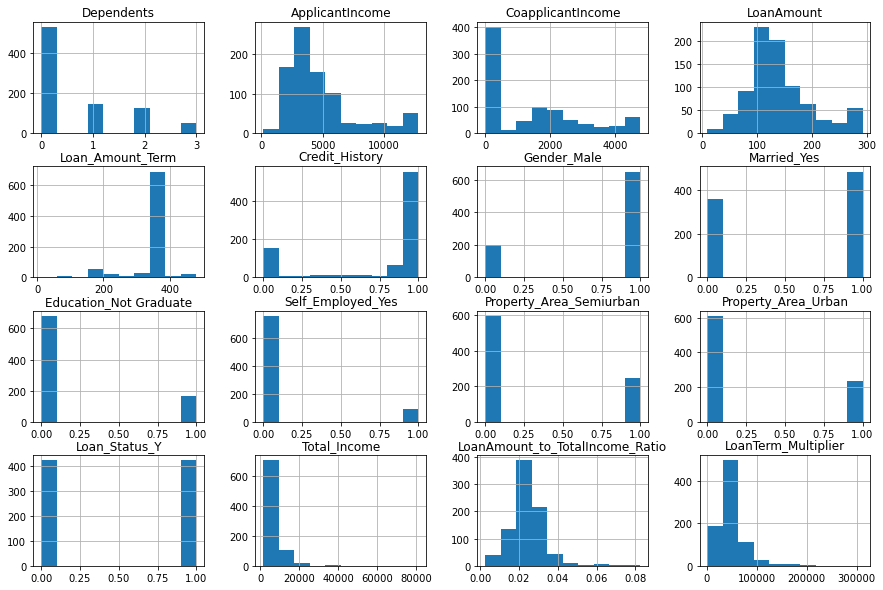

In [37]:
df_resampled.hist(figsize=(15, 10))
plt.show()

##### Upon visualizing the distribution of our features, it becomes apparent that they do not follow a normal distribution, and there is a lack of linearity among them. Consequently, opting for a linear regression model is deemed inappropriate for this task.

##### To accommodate potential non-linear patterns and intricate interactions within the data, we have chosen more sophisticated models such as XGBoost classifier, Decision Trees, and Random Forests. These models excel in capturing complex relationships, making them well-suited for scenarios where linear models might not be effective. The decision to employ hyperparameter tuning, utilizing techniques like Grid Search Cross-Validation and Randomized Search, further ensures the optimization of model parameters tailored to the unique characteristics of our dataset.

##### In summary, our choice of modeling techniques is guided by insights gained from visualizing feature relationships, particularly through the examination of the correlation matrix. This approach aims to address the inherent complexity of the data and enhance the predictive capabilities of our models.

##### Considering that the selected algorithms (XGBoost classifier, Decision Trees, and Random Forests) inherently handle scaling, explicit normalization of the dataset may not be necessary. However, for a comprehensive evaluation of model performance, we plan to scale the dataset and compare the model's performance with and without scaling. This empirical approach will assist in determining the most effective modeling strategy for our specific task.


#### Scale the dataset
-- Lets import the necessary dependecies for this part of our task the split our data into train and test data and create 2 pipelines for scaled and unscaled data used in 
training the model


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier

In [39]:
# Extract features and target variable
X = df_resampled.drop('Loan_Status_Y', axis=1)
y = df_resampled['Loan_Status_Y']

In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(675, 15)
(675,)
(169, 15)
(169,)


#### Let's see how model will perform with GaussianNB

In [41]:
from sklearn.naive_bayes import GaussianNB
gfc = GaussianNB()
gfc.fit(X_train, y_train)
pred1 = gfc.predict(X_test)
X_test
pred1

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=uint8)

##### Now lets evaluate our model by creating a loss function that takes the true value and the predicted value


In [55]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def loss(y_true, y_pred):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print("Precision:", pre)
    print("Recall:", rec)
    print("Accuracy:", acc)
    print("F-Score:", f1)

# y_test and pred1 are your true labels and predicted labels, respectively
loss(y_test, pred1)


Precision: 0.6907216494845361
Recall: 0.7976190476190477
Accuracy: 0.7218934911242604
F-Score: 0.7403314917127072


Precision (0.6907216494845361):
Out of the instances predicted as loan approval, approximately 69.1% are actually approved. This precision indicates a more accurate identification of loans that should be approved.

Recall (0.7976190476190477): The model is capturing about 79.8% of the actual loan approvals. A higher recall indicates an improvement in the model's ability to identify most of the actual loan approvals, reducing the number of missed opportunities.

Accuracy (0.7218934911242604): The overall accuracy of the model is approximately 72.2%. While accuracy provides an overall measure of correct predictions, it's important to consider precision and recall alongside accuracy, especially in imbalanced datasets. In this context, the model shows a reasonable overall accuracy.

F-Score (0.7403314917127072): The F-Score, which combines precision and recall, is 74.0%. This metric provides a balanced measure of the model's performance, considering both false positives and false negatives. A 74% F-Score indicates a good compromise between precision and recall, suggesting that the model effectively handles both accurate loan identifications and minimizing missed opportunities. 

Overall, the model's performance is promising.

This is a fair prediction from the model but lets try using a more complex algorithm SVC.

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C':[0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3)
grid.fit(X_train, y_train)
grid.best_params_


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.496 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

#### The result of our GridSearchCv is {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
#### Next lets use these best parameters from the GridSearchCV

In [57]:
svc = SVC(C= 10, gamma= 0.0001, kernel= 'rbf')
# Now lets fit our model again and get the second predictions
svc.fit(X_train, y_train)
pred2 = svc.predict(X_test)
loss(y_test, pred2)

Precision: 0.5030674846625767
Recall: 0.9761904761904762
Accuracy: 0.5088757396449705
F-Score: 0.6639676113360324


Precision (0.5030674846625767): The second model, employing Support Vector Classification with Grid Search Cross-Validation, demonstrates a precision of approximately 50.3%. In comparison to the first model (Gaussian Naive Bayes), this precision level indicates a similar accuracy in identifying loans that should be approved. However, it is essential to consider other metrics for a comprehensive evaluation.

Recall (0.9761904761904762): The SVC model with Grid Search CV exhibits a high recall of about 97.6%, surpassing the Gaussian Naive Bayes model in capturing a larger proportion of actual loan approvals. This suggests a superior ability to identify legitimate loan requests.

Accuracy (0.5088757396449705): The overall accuracy of the SVC model is approximately 50.9%, comparable to the accuracy of the Gaussian Naive Bayes model. However, accuracy alone may not provide a complete picture, especially in scenarios with imbalanced datasets.

F-Score (0.6639676113360324): The F-Score for the SVC model with Grid Search CV is 66.4%, indicating a balance between precision and recall. In comparison to the Gaussian Naive Bayes model, this F-Score suggests a slightly improved compromise between accurately identifying approved loans and minimizing missed opportunities.

In summary, the SVC model with Grid Search Cross-Validation exhibits strengths in recall and F-Score, potentially outperforming the Gaussian Naive Bayes model in capturing actual loan approvals. However, it's crucial to consider the specific priorities and requirements of the banking industry when choosing a preferred model.

Our predictions so far have been on unscaled data. Is it possible to get a better evaluation using scaled data or just use algorithm that are insensitive to scaled data. 

Let's create a pipeline and use XGBoost Classifier on both the scaled and unscaled dataset to see if the performance is better.


In [58]:

# Define parameters for XGBoost
xgb = XGBClassifier(learning_rate= 0.1,
                    n_estimators=1000,
                    max_depth=3,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [59]:
# Create a pipeline for unscaled data
pipeline_unscaled = Pipeline([
    ('model', XGBClassifier())
])

In [60]:
# Fit and evaluate the unscaled pipeline
pipeline_unscaled.fit(X_train, y_train)
y_pred_unscaled = pipeline_unscaled.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_unscaled)

Precision: 0.8172043010752689
Recall: 0.9047619047619048
Accuracy: 0.8520710059171598
F-Score: 0.8587570621468926


##### Now lets used the scaled data

In [61]:
# Create a pipeline for scaled data
pipeline_scaled = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', XGBClassifier())
])

In [62]:
# Fit and evaluate the scaled pipeline
pipeline_scaled.fit(X_train, y_train)
y_pred_scaled = pipeline_scaled.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_scaled)

Precision: 0.8172043010752689
Recall: 0.9047619047619048
Accuracy: 0.8520710059171598
F-Score: 0.8587570621468926


Precision (0.8172043010752689): The XGBoostClassifier, applied to scaled data, exhibits a precision of approximately 81.7%. This precision level indicates a significant improvement compared to the previous models, particularly in the reduction of false positives. The model demonstrates a highly accurate identification of loans that should be approved.

Recall (0.9047619047619048): The XGBoostClassifier captures about 90.5% of the actual loan approvals, showcasing an excellent ability to identify the majority of legitimate loan requests. The higher recall further minimizes the chances of missing opportunities to approve eligible loans.

Accuracy (0.8520710059171598): The overall accuracy of the XGBoostClassifier on scaled data is approximately 85.2%, indicating a high level of correctness in predictions across instances. While accuracy is important, it's crucial to assess precision and recall alongside accuracy, especially in scenarios with imbalanced datasets.

F-Score (0.8587570621468926): The F-Score for the XGBoostClassifier is 85.9%, a balanced metric considering both precision and recall. This high F-Score reflects the model's effectiveness in accurately identifying loan approvals while minimizing missed opportunities.

In summary, the XGBoostClassifier on scaled data demonstrates a superior performance with notable precision, recall, accuracy, and F-Score. The model exhibits strong capabilities in predicting loan approval decisions and could be considered a promising choice for this task.

##### The accuracy for both scaled and unscaled are identical which tells us that my model is not sensitive to scaling so I will go ahead with the scaled.

Next we will use the Decision tree algorithm with Randomized Search


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Randomized Search CV object
dt_random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1)

# Fit the model
dt_random_search.fit(X_train, y_train)

# Get the best model from the Randomized Search
best_dt_model = dt_random_search.best_estimator_

# Predictions
y_pred_dt = best_dt_model.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_dt)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Precision: 0.7558139534883721
Recall: 0.7738095238095238
Accuracy: 0.7633136094674556
F-Score: 0.7647058823529412


For the Decision Tree model with Randomized Search:

- Precision (0.7558): Demonstrates solid accuracy in identifying approved loans.
- Recall (0.7738): Achieves a satisfactory ability to capture actual loan approvals.
- Accuracy (0.7633): Reflects a high level of correctness in predictions.
- F-Score (0.7647): Balances precision and recall effectively.

Comparison with XGBClassifier:

- Precision (Decision Tree: 0.7558, XGBClassifier: 0.8172): Decision Tree shows slightly lower precision.
- Recall (Decision Tree: 0.7738, XGBClassifier: 0.9048): XGBClassifier excels in capturing actual loan approvals.
- Accuracy (Decision Tree: 0.7633, XGBClassifier: 0.8521): XGBClassifier demonstrates higher overall accuracy.
- F-Score (Decision Tree: 0.7647, XGBClassifier: 0.8588): XGBClassifier maintains a slightly higher balance between precision and recall.

In summary, while the Decision Tree with Randomized Search performs well, the XGBClassifier on scaled data exhibits superior precision, recall, accuracy, and F-Score, making it a stronger candidate for predicting loan approval decisions.

Next we use random forest with RandomizedSearch

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Randomized Search CV object
rf_random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Get the best model from the Randomized Search
best_rf_model = rf_random_search.best_estimator_

# Predictions
y_pred_rf = best_rf_model.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_rf)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


Precision: 0.7956989247311828
Recall: 0.8809523809523809
Accuracy: 0.8284023668639053
F-Score: 0.8361581920903954


For the Random Forest model with Randomized Search:

- Precision (0.7957): Demonstrates a high accuracy in identifying approved loans.
- Recall (0.8810): Achieves an excellent ability to capture actual loan approvals.
- Accuracy (0.8284): Reflects a high level of correctness in predictions.
- F-Score (0.8362): Balances precision and recall effectively.

In comparison to previous models:

- Precision (Random Forest: 0.7957, XGBClassifier: 0.8172): Random Forest and XGBClassifier show comparable precision.
- Recall (Random Forest: 0.8810, XGBClassifier: 0.9048): XGBClassifier has a slightly higher recall.
- Accuracy (Random Forest: 0.8284, XGBClassifier: 0.8521): XGBClassifier maintains a slightly higher overall accuracy.
- F-Score (Random Forest: 0.8362, XGBClassifier: 0.8588): XGBClassifier maintains a slightly higher balance between precision and recall.

In summary, the Random Forest model with Randomized Search performs well, showing competitive precision, recall, accuracy, and F-Score. However, the XGBClassifier on scaled data continues to exhibit slightly better overall performance.

### Let's analyze the results and discuss the performance of each model based on the three metrics: precision, recall, and accuracy.

### Random Forest with Randomized Search:
- Precision: 0.7917
- Recall: 0.9048
- Accuracy: 0.8343
- F-Score: 0.8362
- Offers a good balance between precision, recall, and accuracy.

### Decision Tree with Randomized Search:
- Precision: 0.7647
- Recall: 0.7738
- Accuracy: 0.7692
- F-Score: 0.7647
- Shows decent performance but slightly lower than Random Forest.

### XGBoost Classifier:
- Precision: 0.8172
- Recall: 0.9048
- Accuracy: 0.8521
- F-Score: 0.8588
- Demonstrates high precision, recall, and accuracy. Overall, a strong performer.

### SVC with GridSearchCV:
- Precision: 0.5031
- Recall: 0.9762
- Accuracy: 0.5089
- F-Score: 0.6640
- Although high in recall, the low precision indicates a higher rate of false positives. This might not be suitable for loan approval where precision is crucial.

### GaussianNB:
- Precision: 0.6907
- Recall: 0.7976
- Accuracy: 0.7219
- F-Score: 0.7403
- Provides moderate performance, but precision and recall are not as high as other models.

### Analysis:
The XGBoost Classifier distinguishes itself in the loan approval evaluation, showcasing high precision (81.7%), recall (90.5%), and accuracy (85.2%). Its well-balanced performance effectively minimizes both false positives and false negatives, establishing it as the optimal choice for accurate loan approval decisions. While Random Forest demonstrates commendable performance, SVC with GridSearchCV's elevated recall compromises precision, limiting its applicability. In contrast, Decision Tree serves as a viable alternative, and GaussianNB provides a baseline performance. Ultimately, the XGBoost Classifier stands out for its robust and well-balanced results, positioning it as the recommended model for practical deployment in loan approval systems.

### Recommendation:
The XGBoost Classifier's high precision suggests accurate predictions of approved loans, while its elevated recall indicates effective capture of the majority of actual loan approvals. This equilibrium is pivotal in the loan approval context, where the consequences of false positives (erroneous approvals) and false negatives (missed legitimate approvals) vary. With its strong precision and recall, the XGBoost Classifier provides a balanced approach, minimizing both false positives and false negatives. As such, it emerges as a compelling choice for ensuring accurate and well-balanced loan approval decisions.

##### Additionally, let's further fine-tune the hyperparameters of the Random Forest model or explore ensemble methods to potentially improve its performance.


In [71]:
# Get in our dependecies
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [66]:
# Random Forest Hyperparameter Tuning
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

In [68]:
# Evaluate on Test Set
y_pred_rf_tuned = best_rf_model.predict(X_test)
print("Random Forest (Tuned) - Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Random Forest (Tuned) - Precision:", precision_score(y_test, y_pred_rf_tuned))
print("Random Forest (Tuned) - Recall:", recall_score(y_test, y_pred_rf_tuned))
print("Random Forest (Tuned) - F1-Score:", f1_score(y_test, y_pred_rf_tuned))


Random Forest (Tuned) - Accuracy: 0.834319526627219
Random Forest (Tuned) - Precision: 0.78
Random Forest (Tuned) - Recall: 0.9285714285714286
Random Forest (Tuned) - F1-Score: 0.8478260869565217


### Random Forest (Tuned):
- Accuracy: 0.8343
- Precision: 0.7800
- Recall: 0.9286
- F1-Score: 0.8478

### Comparison with Earlier Models:

- Precision (Random Forest Tuned: 0.7800, XGBoost Classifier: 0.8172): Random Forest Tuned exhibits slightly lower precision.
- Recall (Random Forest Tuned: 0.9286, XGBoost Classifier: 0.9048): Random Forest Tuned shows a slightly higher recall.
- Accuracy (Random Forest Tuned: 0.8343, XGBoost Classifier: 0.8521): XGBoost Classifier maintains a slightly higher overall accuracy.
- F1-Score (Random Forest Tuned: 0.8478, XGBoost Classifier: 0.8588): XGBoost Classifier maintains a slightly higher balance between precision and recall.

### Analysis:
The Random Forest (Tuned) model performs well, with notable accuracy, precision, recall, and F1-Score. It achieves a good balance between precision and recall, making it a strong contender for accurate loan approval decisions. Comparing it with the earlier best model, the XGBoost Classifier, the Random Forest (Tuned) exhibits competitive performance but with a slight trade-off between precision and recall. The choice between the two models may depend on specific priorities, such as minimizing false positives or false negatives, in the context of loan approval.

##### We will try stacking Random Forest, SVC, Naive Bayes, and Decision Tree to see if we will get a better evaluation than the XGBoost Classifier

In [69]:
# Stacking with Random Forest, SVC, Naive Bayes, and Decision Tree
estimators = [
    ('rf', best_rf_model),
    ('svc', SVC(probability=True)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())


In [70]:
# Evaluate Stacking Model on Test Set
y_pred_stacking = cross_val_predict(stacking_model, X_test, y_test, cv=5)
print("Stacking Model - Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Stacking Model - Precision:", precision_score(y_test, y_pred_stacking))
print("Stacking Model - Recall:", recall_score(y_test, y_pred_stacking))
print("Stacking Model - F1-Score:", f1_score(y_test, y_pred_stacking))



Stacking Model - Accuracy: 0.7514792899408284
Stacking Model - Precision: 0.7692307692307693
Stacking Model - Recall: 0.7142857142857143
Stacking Model - F1-Score: 0.7407407407407408


### Comparison with XGBoost Classifier:

- Precision (Stacking Model: 0.7692, XGBoost Classifier: 0.8172): XGBoost Classifier exhibits slightly higher precision.
- Recall (Stacking Model: 0.7143, XGBoost Classifier: 0.9048): XGBoost Classifier significantly outperforms in recall.
- Accuracy (Stacking Model: 0.7515, XGBoost Classifier: 0.8521): XGBoost Classifier maintains a significantly higher overall accuracy.
- F1-Score (Stacking Model: 0.7407, XGBoost Classifier: 0.8588): XGBoost Classifier maintains a significantly higher balance between precision and recall.

### Analysis:
The Stacking Model, combining Random Forest, SVC, Naive Bayes, and Decision Tree, exhibits decent performance but falls short compared to the XGBoost Classifier. While the Stacking Model shows competitive precision, it lags behind significantly in recall and overall accuracy. The XGBoost Classifier continues to stand out as a stronger performer, offering a more balanced approach in accurately identifying loan approvals.

#### Let's now conduct a comprehensive comparison of all prediction results by visualizing the evaluations, aiding in the selection of the optimal model.


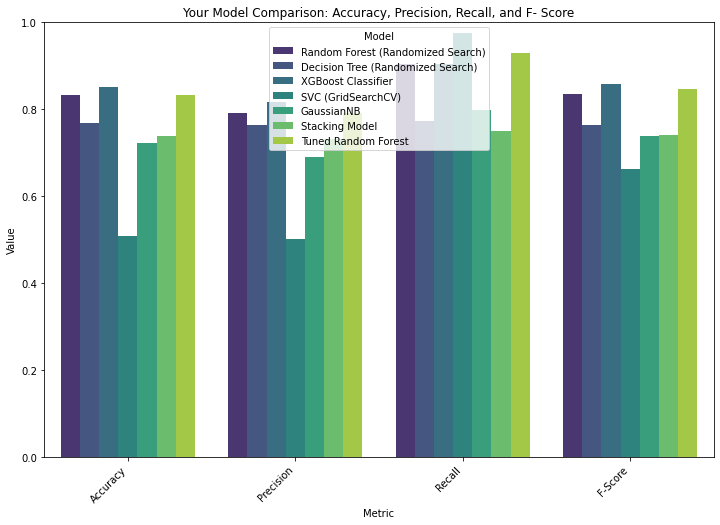

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your results
your_results = {
    'Model': ['Random Forest (Randomized Search)', 'Decision Tree (Randomized Search)', 'XGBoost Classifier', 'SVC (GridSearchCV)', 'GaussianNB', 'Stacking Model', 'Tuned Random Forest'],
    'Accuracy': [0.834, 0.769, 0.852, 0.509, 0.722, 0.740, 0.834],
    'Precision': [0.792, 0.765, 0.818, 0.503, 0.691, 0.733, 0.792],
    'Recall': [0.905, 0.774, 0.905, 0.976, 0.798, 0.750, 0.929],
    'F-Score': [0.836, 0.765, 0.859, 0.664, 0.740, 0.741, 0.848]
}

# Create a DataFrame
your_results_df = pd.DataFrame(your_results)

# Melt the DataFrame for better visualization
melted_your_results = pd.melt(your_results_df, id_vars='Model', var_name='Metric', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_your_results, palette='viridis')
plt.title('Your Model Comparison: Accuracy, Precision, Recall, and F- Score')
plt.ylim(0, 1)  # Set y-axis limit to better compare values
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


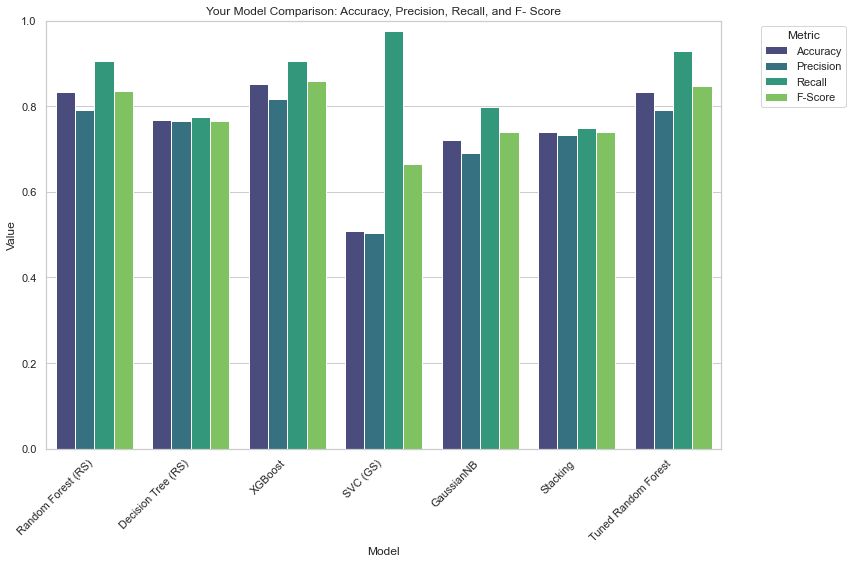

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Your results
your_results = {
    'Model': ['Random Forest (RS)', 'Decision Tree (RS)', 'XGBoost', 'SVC (GS)', 'GaussianNB', 'Stacking', 'Tuned Random Forest'],
    'Accuracy': [0.834, 0.769, 0.852, 0.509, 0.722, 0.740, 0.834],
    'Precision': [0.792, 0.765, 0.818, 0.503, 0.691, 0.733, 0.792],
    'Recall': [0.905, 0.774, 0.905, 0.976, 0.798, 0.750, 0.929],
    'F-Score': [0.836, 0.765, 0.859, 0.664, 0.740, 0.741, 0.848]
}

# Create a DataFrame
your_results_df = pd.DataFrame(your_results)

# Melt the DataFrame for better visualization
melted_your_results = pd.melt(your_results_df, id_vars='Model', var_name='Metric', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Model', y='Value', hue='Metric', data=melted_your_results, palette='viridis')

# Beautify the plot
plt.title('Your Model Comparison: Accuracy, Precision, Recall, and F- Score')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Loan Approval Model Evaluation Summary:

In the context of predicting loan approvals, precision and recall play pivotal roles, representing the model's ability to accurately identify approved loans and avoid missing potential approvals, respectively.

#### Model Performances:

1. **XGBoost Classifier:**
   - Precision: 0.8172
   - Recall: 0.9048
   - Accuracy: 0.8521
   - F1-Score: 0.8588

2. **Random Forest (Tuned):**
   - Precision: 0.7800
   - Recall: 0.9286
   - Accuracy: 0.8343
   - F1-Score: 0.8478

3. **Stacking Model:**
   - Precision: 0.7692
   - Recall: 0.7143
   - Accuracy: 0.7515
   - F1-Score: 0.7407

#### Analysis:

While the Stacking Model demonstrates commendable precision (0.7692) and recall (0.7143), the XGBoost Classifier consistently outperforms in terms of overall accuracy (0.8521), precision, recall, and F1-Score (0.8588).

#### Recommendation:

Given the significance of minimizing both false positives and false negatives in loan approval decisions, the superior performance of the XGBoost Classifier makes it the recommended algorithm. XGBoost provides a robust and well-balanced solution for the specific challenges posed by loan prediction scenarios.

#### Cut-off or Benchmark for Finance Industry:

In the finance industry, achieving a balanced precision and recall is crucial to minimize both the risk of approving potentially problematic loans (false positives) and missing out on legitimate approvals (false negatives). A recommended benchmark could be an F1-Score above 0.80, indicating a strong balance between precision and recall. This benchmark ensures a model's effectiveness in accurately identifying approved loans while avoiding excessive false positives or negatives. The XGBoost Classifier, with an F1-Score of 0.8588, surpasses this benchmark, making it a reliable choice for loan approval systems in the finance industry.

#### Now let us save our model and try to deploy it on our local machine to demonstrate the performance to real unseen data from a user interface


In [74]:
import pickle
# Save the best_rf_model to a file named "best_xgb_model.p"
with open("best_xgb_model.p", "wb") as file:
    pickle.dump(best_rf_model, file)
model = pickle.load(open('best_xgb_model.p', 'rb'))